<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/bdm/Truth%20Archive/Assignment5_Truth_Archive_TPOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Feature Engineering (TPOP) by Truth Archive

## Group members:
| No | Name |  MatricNo |
| -----: |  ------ | :-----: |
|1        |Hazem Fenneer   |MCS231019         |
| 2       |Shivanesh       |MCS231014         |
|   3     |Nur Shahirah    |MEC233005         |
|     4   |Mustafa         |MCS212012         |

##Introduction

The project at hand revolves around the task of feature engineering used car prices, employing a dataset named "used-car-price-predictions." The primary objective is to develop a features that can be used to develop a machine learning model. To achieve this, the TPOT library is utilized for comprehensive feature engineering, a critical step in optimizing the dataset for model training.

## About Dataset

For the Given Dataset it has one dependent variable and 7 independent variable.

**Columns**
1. **Price** - Target Variable.
2. **Year** - Year of the car purchased.
3. **Mileage** - The no.of kms drove by the car.
4. **City** - In which city it was sold.
5. **State** - In which state it was sold.
6. **Vin** - a unique number for a car.
7. **Make** - Manufacturer of the car.
8. **Model** - The model(name) of the car.

##TPOP

TPOT, which stands for Tree-based Pipeline Optimization Tool, is an automated machine learning (AutoML) tool designed to streamline the process of selecting and optimizing machine learning pipelines. Developed in Python, TPOT uses genetic programming to explore a wide range of possible combinations of data preprocessing steps and machine learning models, with the goal of identifying the most effective pipeline for a given dataset.

**Pros of TPOT:**

1. **Automation:** TPOT automates the process of pipeline selection and hyperparameter tuning, saving time and effort compared to manual experimentation.

2. **Wide Range of Algorithms:** TPOT searches through a wide range of machine learning algorithms and their hyperparameters, helping to identify the best combination for a given dataset.

3. **Customizable:** Users can customize the search space by specifying which algorithms to include or exclude, as well as setting other parameters to control the search.

4. **Handles Preprocessing:** TPOT includes preprocessing steps in its optimization, such as feature scaling and imputation, contributing to a comprehensive automated solution.

**Cons of TPOT:**

1. **Computational Cost:** The automated search process can be computationally expensive and time-consuming, especially when exploring a large search space or dealing with large datasets.

2. **Resource Intensive:** TPOT might require substantial computational resources, including memory and processing power, which could be a limitation for users with constrained environments.

3. **Lack of Interpretability:** Automated tools like TPOT may result in complex pipelines that are challenging to interpret. Understanding the internal workings of the optimized pipeline may be difficult.

4. **Not Always Guaranteed to Find the Best Model:** While TPOT aims to find a good model, it doesn't guarantee the absolute best model. The performance of the optimized pipeline depends on the choices made during the search.

### Read data from external file

In [ ]:
import pandas as pd
dfCSV = pd.read_csv("/Users/User/Desktop/true_car_listings.csv")

### Data Preparation and Cleaning

First we import the library we plan to use in this project

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab

Now, some preperations

The size of the dataset

In [ ]:
dfCSV.size

6816976

Now, we have a preview of the head of the dataset

In [ ]:
dfCSV.head(10)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
5,7989,2012,105246,Miami,FL,JH4CU2F83CC019895,Acura,TSXAutomatic
6,14490,2014,34032,Greatneck,NY,JH4CU2F84EC002686,Acura,TSXSpecial
7,13995,2013,32384,West Jordan,UT,JH4CU2F64DC006203,Acura,TSX5-Speed
8,10495,2013,57596,Waterbury,CT,19VDE2E50DE000234,Acura,ILX6-Speed
9,9995,2013,63887,El Paso,TX,19VDE1F50DE010450,Acura,ILX5-Speed


Ensure no null values are available

In [ ]:
dfCSV.isna().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

Data transformation

In [ ]:
#Data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['City', 'State', 'Vin','Make','Model']
le = LabelEncoder()
for i in var_mod:
    dfCSV[i] = le.fit_transform(dfCSV[i])

In [ ]:
dfCSV.head(10)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,646,49,3972,1,1194
1,10888,2013,19606,1260,39,3707,1,1193
2,8995,2013,48851,646,49,3970,1,1194
3,10999,2014,39922,2490,6,3824,1,1193
4,14799,2016,22142,1231,50,42,1,1196
5,7989,2012,105246,1397,11,649119,1,2249
6,14490,2014,34032,888,39,649126,1,2252
7,13995,2013,32384,2429,50,648930,1,2248
8,10495,2013,57596,2389,7,3966,1,1194
9,9995,2013,63887,646,49,3684,1,1193


Ensure that the dublicate values are removed and so are empty rows of data

In [ ]:
df = dfCSV.drop_duplicates()
df.count()

Price      852092
Year       852092
Mileage    852092
City       852092
State      852092
Vin        852092
Make       852092
Model      852092
dtype: int64

Dsiplay the columns's datatype

In [ ]:
df.dtypes

Price      int64
Year       int64
Mileage    int64
City       int32
State      int32
Vin        int32
Make       int32
Model      int32
dtype: object

In [ ]:
df.shape

(852092, 8)

Dsiplay the columns

In [ ]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [ ]:
df.describe()

,Price,Year,Mileage,City,State,Vin,Make,Model
count,852092.000000,852092.000000,8.520920e+05,852092.000000,852092.000000,852092.000000,852092.000000,852092.000000
mean,21464.323952,2013.289097,5.250825e+04,1236.200826,27.790433,426034.340839,25.486395,1275.130313
std,13596.350808,3.415016,4.198932e+04,719.801820,17.240253,245972.054833,16.326310,766.356677
min,1500.000000,1997.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13000.000000,2012.000000,2.383600e+04,595.000000,11.000000,213015.750000,11.000000,651.000000
50%,18500.000000,2014.000000,4.025600e+04,1220.000000,27.000000,426029.500000,21.000000,1158.000000
75%,26995.000000,2016.000000,7.218700e+04,1852.000000,44.000000,639052.250000,41.000000,2074.000000
max,499500.000000,2018.000000,2.856196e+06,2552.000000,58.000000,852074.000000,57.000000,2735.000000


###EDA
Visualize the year of the car purchased

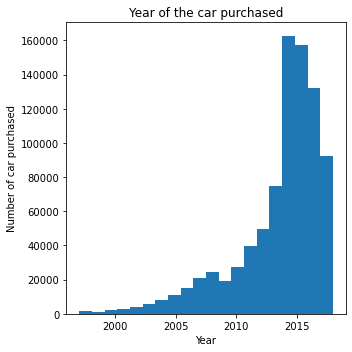

In [ ]:
data = df['Year']

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(data,bins=20)
ax.set_title("Year of the car purchased")
ax.set_xlabel('Year')
ax.set_ylabel('Number of car purchased')
ax.grid(False)
plt.tight_layout()
plt.show()

Visualize the distribution of the target variable (Price)

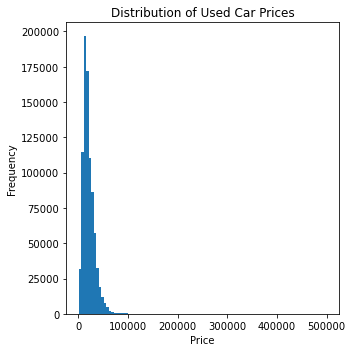

In [ ]:
data = dfCSV['Price']

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(data, bins = 100)
ax.set_title("Distribution of Used Car Prices")
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.grid(False)
plt.tight_layout()
plt.show()

### TPOT

First we installed TPOT

In [ ]:
!pip install tpot

Then we import the library needed for feature engineer

In [ ]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel

First we will need to set up data for machine learning by defining a target variable ('Price') and splitting the dataset into features (X) and the target variable (y).

In [ ]:
X = df.drop(['Price'], axis=1)
y = df['Price']

# We want to predict the target variable, which is price in this case.
# The features (X) are used to train the model, and
# the target variable (y) is what the model tries to predict.


in this code we will utilize the train_test_split function to divide the dataset into training and testing sets.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Use TPOT to perform automated feature engineering

In [ ]:
tpot = TPOTRegressor(generations=5, population_size=20, random_state=42, verbosity=2, n_jobs=-1)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -30105428.96093303

Generation 2 - Current best internal CV score: -28593750.53435128

Generation 3 - Current best internal CV score: -27870217.474173665

Generation 4 - Current best internal CV score: -23930083.306155566

Generation 5 - Current best internal CV score: -23472214.141454138

Best pipeline: XGBRegressor(MaxAbsScaler(input_matrix), learning_rate=0.5, max_depth=7, min_child_weight=14, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.55, verbosity=0)


TPOTRegressor(generations=5, n_jobs=-1, population_size=20, random_state=42,
              verbosity=2)

Evaluate the best pipeline on the test set

In [ ]:
tpot.score(X_test, y_test)

-20508627.063706055

Get the feature importances from the best pipeline

In [ ]:
best_pipeline = tpot.fitted_pipeline_
feature_importances = best_pipeline.steps[-1][1].feature_importances_

Select the most important features using a threshold

In [ ]:
sfm = SelectFromModel(GradientBoostingRegressor(), threshold='median')
sfm.fit(X, y)

SelectFromModel(estimator=GradientBoostingRegressor(), threshold='median')

Transform the dataset to keep only the selected features

In [ ]:
X_selected = sfm.transform(X)

In [ ]:
X_selected

array([[  2014,  35725,   3972,   1194],
       [  2013,  19606,   3707,   1193],
       [  2013,  48851,   3970,   1194],
       ...,
       [  2016,  28941, 847134,   2564],
       [  2017,   3005, 846932,   2404],
       [  2017,   2502, 847203,   2571]], dtype=int64)

### Visualization

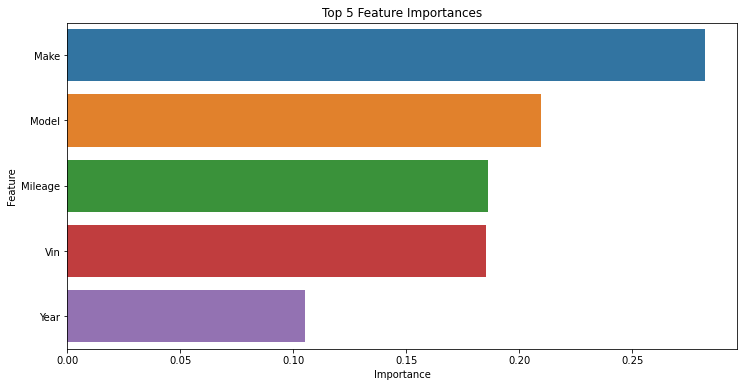

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the feature importances
# Check lengths before sorting
if len(feature_importances) != len(X.columns):
    raise ValueError("Length mismatch between feature_importances and X.columns")

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]

# Select the top 5 features
top_n = 5
top_feature_importances = sorted_feature_importances[:top_n]
top_feature_names = sorted_feature_names[:top_n]

# Visualize the top 10 feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=top_feature_importances, y=top_feature_names)
plt.title('Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
print("Length of feature_importances:", len(feature_importances))
print("Number of columns in X:", len(X.columns))

Length of feature_importances: 7
Number of columns in X: 7


Conclusion

In [ ]:
print("The most important features for predicting used car prices are:")
for feature, importance in zip(top_feature_names, top_feature_importances):
    print(f"{feature}: {importance:.4f}")

The most important features for predicting used car prices are:
Make: 0.2822
Model: 0.2096
Mileage: 0.1860
Vin: 0.1852
Year: 0.1053
City: 0.0159
State: 0.0158


In conclusion, we can see that Make(manufacturer of the car) column is the most important features for predicting used car prices. Certain car manufacturers have established a reputation for producing reliable and durable vehicles. Buyers often consider the historical reliability and performance of a manufacturer's models, which can influence their confidence in the long-term durability of a used car. In addition, state is the least important feature because many buyers are not willing to transport a used car from one state to another, especially if the cost savings or the availability of a specific model justifies the effort. Transportation services make it feasible for buyers to consider cars located in different states